<a href="https://colab.research.google.com/github/caiovolotao/Lista-de-vibra-es/blob/main/graficos_de_amortecimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sympy.abc import gamma, omega

In [ ]:
xo, vo = symbols('xo vo', real=True)
t = symbols('t', real=True)
 


In [ ]:
#  Variáveis escalares:

x = Function('x')
def x_(t):
    return x(t).diff(t)
def x__(t):
    return x_(t).diff(t)

In [ ]:
eq_oh = Eq(x__(t) + 2*gamma*x_(t) + omega**2*x(t), 0)
eq_oh

Eq(2*gamma*Derivative(x(t), t) + omega**2*x(t) + Derivative(x(t), (t, 2)), 0)

In [ ]:
#  Resolvendo EDO

#  Dicionário com as condições iniciais:
ics = {x(0): xo, x_(t).subs(t, 0): vo}

dsolve(eq_oh, ics=ics)

Eq(x(t), (-gamma*xo/(2*sqrt(gamma**2 - omega**2)) - vo/(2*sqrt(gamma**2 - omega**2)) + xo/2)*exp(-t*(gamma + sqrt(gamma**2 - omega**2))) + (gamma*xo/(2*sqrt(gamma**2 - omega**2)) + vo/(2*sqrt(gamma**2 - omega**2)) + xo/2)*exp(t*(-gamma + sqrt(gamma**2 - omega**2))))

In [ ]:
def x_oh(omg, gmma=0, vo=0, xo=1, T=np.arange(0, 4, 0.01)):
    eq_oh = Eq(x__(t) + 2*gmma*x_(t) + omg**2*x(t), 0)
    res = dsolve(eq_oh, ics={x(0): xo, x_(t).subs(t, 0): vo})
    x_sol = lambdify(t, res.rhs, 'numpy')
    return res, np.real(x_sol(T))

In [ ]:
res, x_sol = x_oh(2, vo=1)  #  OH Simples
res, x_sol = x_oh(2, gmma=1, vo=1)  #  OH Subamortecido
res

Eq(x(t), (2*sqrt(3)*sin(sqrt(3)*t)/3 + cos(sqrt(3)*t))*exp(-t))

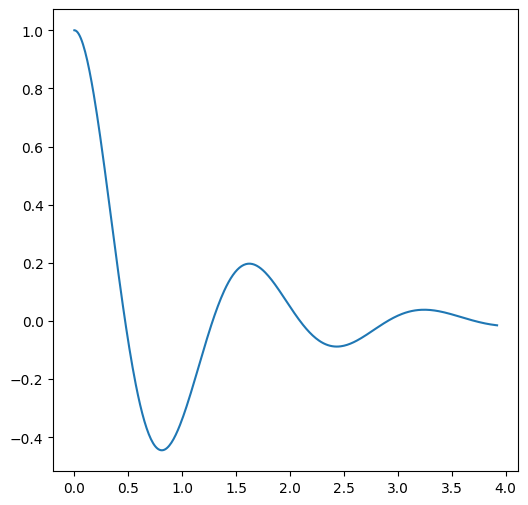

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
omg = 4
gmma = 1
tempo = np.arange(0, 5*(np.pi/omg), 0.01)
res, y = x_oh(omg, gmma, T=tempo)

ax.plot(tempo, y)
plt.show()

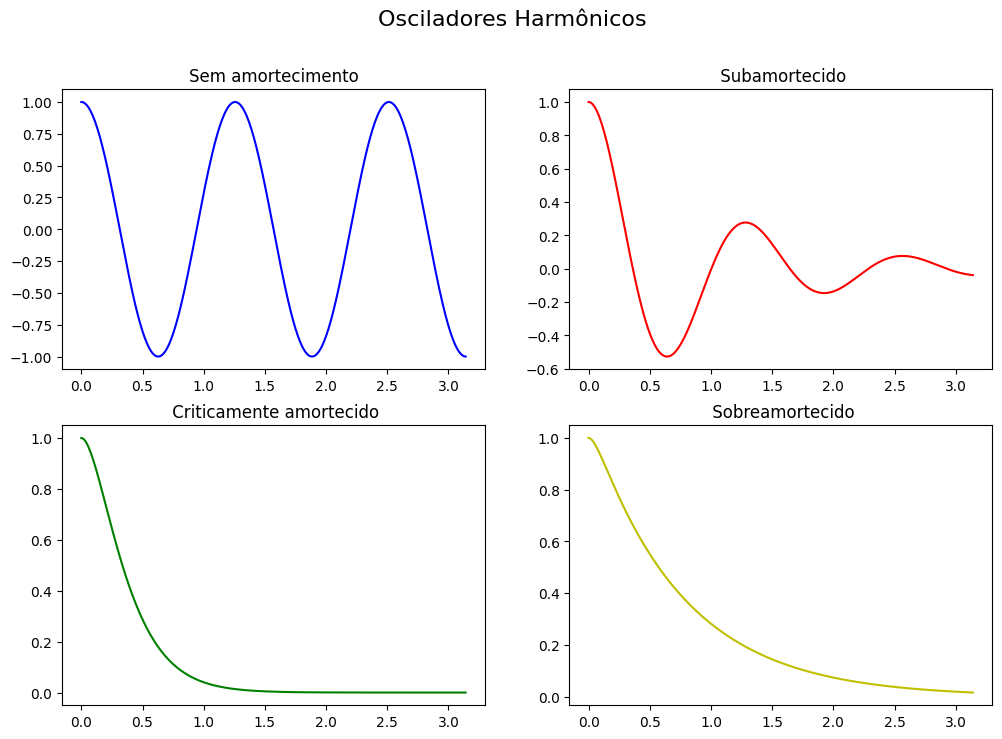

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

omg = 5
gmma = [0, 1, omg, 2*omg]
title = 'Sem amortecimento; Subamortecido; Criticamente amortecido; Sobreamortecido'.split(';')
cores = 'b r g y'.split(' ')

#  Domínio do tempo:
tempo = np.arange(0, 5*(np.pi/omg), 0.01)

res = []

for g, axe, fname, cor in zip(gmma, ax.flat, title, cores):
    sol = x_oh(omg, g, T=tempo)
    axe.plot(tempo, sol[1], c=cor)
    axe.set_title(fname)

fig.suptitle("Osciladores Harmônicos", fontsize=16)
plt.show()